#Intro

This is the sixth (and final) practical homework for the ML seminar.  We will focus on the **EM/GMM** algorithm and we will work with a new 2D dataset and with a 1D dataset of your own.

Observation: when we apply the clustering algorithm, we will apply it only on the input columns (i.e. do not include the y variable! include only the X variable).

# Tasks

The tasks are as follows. 

1. Here we will work only with the **2D dataset**. 

a. Fit an EM/GMM with 6 normal distributions.

b. Print the soft clustering table.

c. Visualize the dataset in 2D by colouring the points in a cluster (consider the hard clustering resulted from the soft clustering) with the same colour. Did you obtain almost the original labels for the dataset or not?

2. Here we will work only with the **1D dataset**. 

a. Create a function `generateData(pis,mus,sigmas,n)`, where `pis,mus,sigmas` are the parameters of a Gaussian Mixture Model (GMM) on 1D data, e.g. if `pis = [0.5,0.5], mus = [0,1], sigmas = [1,2]`, then $$\pi_1 = 0.5, \mu_1=0, \sigma_1 = 1$$ $$\pi_2 = 0.5, \mu_2=10, \sigma_2=2.$$ This function will return a dataset (a list of real numbers) of length `n` (i.e. you have `n` observations/instances) that is generated by a GMM with the parameters given by `pis,mus,sigmas`. 

*Hints:*
*   *To generate the $Z$ data use `numpy.random.choice` with `p` and `size` set accordingly. Don't forget you must NOT return the z values.*
*   *To generate the $X|Z=z$ data use `numpy.random.normal` with `loc`, `scale` and `size` set accordingly.*

b. Fit a GMM on this dataset via EM/GMM. Check if the estimated parameters from EM/GMM are almost the same as the original parameters. *Hint: precision = $\frac{1}{\sigma^2}$ in the 1D case.*

c. Plot the resulted normal distributions on the same plot (i.e., $\mathcal{N}_1(x)$, $\mathcal{N}_2(x)$, ...). For the normal probability density function you can use something of your own or `scipy.stats.norm` with `loc` and `scale` set accordingly.

d. Plot the resulted normal distributions multiplied by the selection probabilities (i.e. $\pi_1 \mathcal{N}_1(x)$, $\pi_2 \mathcal{N}_2(x)$, ...)

e. Plot the resulted mixture's probability density function (pdf) (i.e., $\pi_1 \mathcal{N}_1(x) + \pi_2 \mathcal{N}_2(x) + ...$).

On each of the three plots above, visualize also the generated dataset by colouring the points in a cluster (consider the hard clustering resulted from the soft clustering) with the same colour. *Suggestion: Add them on the 2D plot with the coordinate on Oy = 0.*

# Task 1

## Get dataset

In [2]:
!wget https://raw.githubusercontent.com/aciobanusebi/ml2/master/planar_utils_modified.py
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.tree
import sklearn.naive_bayes
from planar_utils_modified import plot_decision_boundary, load_planar_dataset, load_extra_datasets

%matplotlib inline

--2021-01-13 21:27:11--  https://raw.githubusercontent.com/aciobanusebi/ml2/master/planar_utils_modified.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2106 (2.1K) [text/plain]
Saving to: ‘planar_utils_modified.py’

planar_utils_modifi 100%[===================>]   2.06K  --.-KB/s    in 0s      

2021-01-13 21:27:11 (48.4 MB/s) - ‘planar_utils_modified.py’ saved [2106/2106]



In [3]:
X, y = load_extra_datasets()[2]

Visualize the data

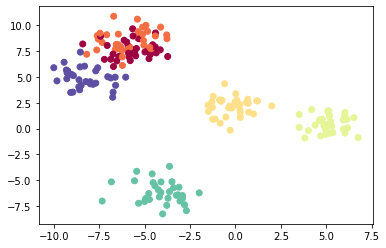

In [4]:
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## Task 1 - solution

In [5]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=6, random_state=0).fit(X)

In [6]:
proba = gm.predict_proba(X)

for i in range(len(proba)):
  for j in range(len(proba[i])):
    print(proba[i][j],end="\t")
  print()

6.091038875490224e-13	0.9999999999506057	4.848123113333386e-21	1.5466480512921925e-14	1.1334548315599784e-11	3.7435556373535664e-11	
1.1934219408075489e-48	1.9664864739301605e-13	4.281086066323143e-30	0.9999999999998033	6.057206634068538e-43	2.4495759921581113e-56	
6.862362547956518e-60	4.060009518442809e-23	1.0	1.8281696121835392e-44	1.547619880443717e-35	2.0687672355704634e-49	
2.1506879692640207e-44	4.8478180581041764e-11	6.496889978656898e-29	0.9999999999515219	2.226160923817781e-39	1.7346921630822122e-50	
0.9764144457871345	4.785283621892228e-22	4.34327973137714e-39	5.271062253235637e-63	8.435739605574815e-05	0.023501196816809677	
1.2793484644883457e-18	0.9999999999775975	1.180558784610332e-15	2.2341564831984107e-11	5.854439911634217e-14	1.4417679376143292e-15	
6.460891115789079e-07	3.654154152690192e-23	1.3009902815874323e-22	2.9777866930876237e-69	0.999999353910888	9.046198221445987e-17	
3.0070100996121536e-22	0.9989047051369714	4.98253569205784e-24	0.0010952948630288946	5.15467

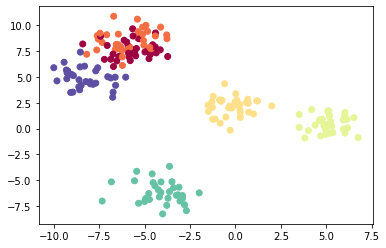

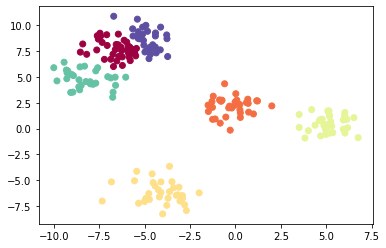

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) # original
plt.show()
plt.scatter(X[:, 0], X[:, 1], c=gm.predict(X), cmap=plt.cm.Spectral) # trained model

*Did you obtain almost the original labels for the dataset or not?*

Yes, the graph representing the model is almost identical to the original graph (the only slightly erronated clusters are the three clusters in the top left because they're so close they almost overlay eachother).

# Task 2

## Task 2 - solution

In [8]:
def generateData(pis, mus, sigmas, n):
  s = min(len(pis), len(mus), len(sigmas))
  z = np.random.choice(s, size=n, p=pis)
  xz = np.random.normal(loc=mus, scale=sigmas, size=(n,2))

  return [[xz[i][z[i]]] for i in range(n)]

In [9]:
pis = [0.5, 0.5]
mus = [0, 10]
sigmas = [1, 2]
n = 10

X = generateData(pis, mus, sigmas, n)

In [10]:
s = min(len(pis), len(mus), len(sigmas))
gmm = GaussianMixture(n_components=s).fit(X)

In [11]:
e = np.divide(1, np.dot(sigmas, sigmas))

print("required precision: ", e, end="\n\n")

print("estimated pis: ", gmm.weights_)
acc = np.abs(gmm.weights_ - pis)
print("accuracy: ", acc)
print("ok: ", acc <= e, end="\n\n")

print("estimated mus: ", gmm.means_[:,0])
acc = np.abs(gmm.means_[:,0] - mus)
print("accuracy: ", acc)
print("ok: ", acc <= e, end="\n\n")

print("estimated sigmas: ", np.sqrt(gmm.covariances_[:,0,0]))
acc = np.abs(np.sqrt(gmm.covariances_[:,0,0]) - sigmas)
print("accuracy: ", acc)
print("ok: ", acc <= e, end="\n\n")


# the estimated parameters seem to be a little off

required precision:  0.2

estimated pis:  [0.19981691 0.80018309]
accuracy:  [0.30018309 0.30018309]
ok:  [False False]

estimated mus:  [-0.78466008 10.18118698]
accuracy:  [0.78466008 0.18118698]
ok:  [False  True]

estimated sigmas:  [0.80228969 2.70460367]
accuracy:  [0.19771031 0.70460367]
ok:  [ True False]



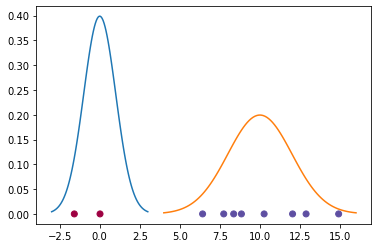

In [12]:
from scipy.stats import norm

for i in range(len(mus)):
  x = np.linspace(-3*sigmas[i] + mus[i], 3*sigmas[i] + mus[i], 100)
  plt.plot(x, norm.pdf(x, mus[i], sigmas[i]))

plt.scatter(X, [0 for i in range(len(X))], c=gmm.predict(X), cmap=plt.cm.Spectral)


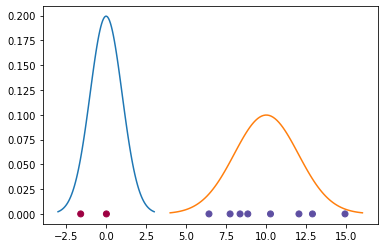

In [13]:
from scipy.stats import norm

for i in range(len(mus)):
  x = np.linspace(-3*sigmas[i] + mus[i], 3*sigmas[i] + mus[i], 100)
  plt.plot(x, np.dot(pis[i], norm.pdf(x, mus[i], sigmas[i])))

plt.scatter(X, [0 for i in range(len(X))], c=gmm.predict(X), cmap=plt.cm.Spectral)


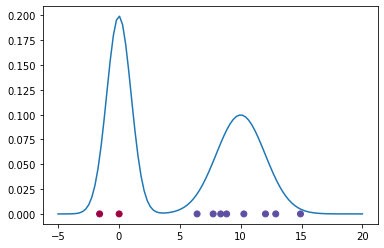

In [14]:
from scipy.stats import norm
# aa ups
x = np.linspace(-5,20, 100)
plt.plot(x, pis[0] * norm.pdf(x, mus[0], sigmas[0]) + pis[1] * norm.pdf(x, mus[1], sigmas[1]))

plt.scatter(X, [0 for i in range(len(X))], c=gmm.predict(X), cmap=plt.cm.Spectral)